Khyati Gupta
8031075887



# **Image Classification using PyTorch (100 points)**

In this programming assignment, we are going to be performing image classification using convolutional neural networks. We will use the CIFAR-10 data set.

The **CIFAR-10** dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

To implement the CNN, we will use PyTorch.


**STEP 0: Import Necessary Libraries**

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

**STEP 1: Load and Normalize Dataset (20 points)**

Using torchvision, it’s extremely easy to load CIFAR10.

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1]. 

We have given you the code for transformations; you have to use it while creating trainloader and testloaders.

- Use batch size of 16 images.
- Store data in root file of './data'. 

**Do NOT shuffle the dataset.**

Helpful Links:

1.   [Torchvision for CIFAR10](https://pytorch.org/vision/stable/datasets.html#cifar)
2.   [DataLoaders](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)

#### <span style="color: red;">To Do:</span>

1. Load the training dataset of CIFAR10 from torchvision.datasets into the trainset variable, and make sure to apply the given transform. Make sure to use the same batch_size while developing the trainloader.
2. Load the test dataset of CIFAR10 from torchvision.datasets into the testset variable, and make sure to apply the given transform. Make sure to use the same batch_size while developing the testloader.


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

trainset, trainloader = None, None
testset, testloader = None, None

##### INPUT CODE HERE (~4 lines of code) ######
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, transform = transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=False)
testset = torchvision.datasets.CIFAR10(root = './data', train = False, transform = transform, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=False)
##############################################

classes = ('Airplane', 'Automobie', 'Bird', 'Cat',
           'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

100%|██████████| 170498071/170498071 [00:05<00:00, 29511973.41it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


**STEP 2: Function to Display Images (20 points)**

Here, you can display a random batch of images from the dataloaders

#### <span style="color: red;">To Do:</span>

1. Get a random batch of training examples. 
2. Show the images by calling the imshow() function. Make sure to send the correct parameter to the function. 

When you execute this cell, it should output 16 images and their corresponding true labels. 

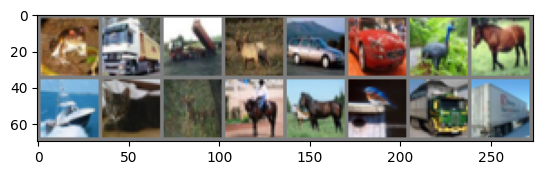

True Labels:
Frog  Truck Truck Deer  Automobie Automobie Bird  Horse Ship  Cat   Deer  Horse Horse Bird  Truck Truck


In [3]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
##### INPUT CODE HERE (~2 lines of code) ######
iterator = iter(trainloader)
imgs, labels = next(iterator)
##############################################

# show images
##### INPUT CODE HERE (~1 lines of code) ######

imshow(torchvision.utils.make_grid(imgs))
##############################################

# print labels
print("True Labels:")
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


**STEP 3: Define a CNN (24 points)**

Here, you must create the structure of the CNN as given in the following image. Construct a LeNet-5 style CNN network, using PyTorch functions. LeNet-5 is shown in the figure below. Note that the network is not exactly the same as described in the original, 1998, paper.

You have to define the variables in the **\_\_init\_\_** method and then implement the **forward** method.

#### <span style="color: red;">To Do:</span>

Use the following details to implement the CNN architecture:-

1. The first layer has six 5 x 5 convolution filters, stride as 1, each followed by a max-pooling layer of 2 x 2 with stride as 2.
2. Second convolution layer has sixteen 5 x 5 convolution filters, stride as 1, each followed by 2 x 2 max-pooling with stride as 2.
3. Flatten the previous layers.
4. Next is a fully connected layer of dimensions 120 followed by another fully connected layer of dimensions 84.
5. Next is a fully connected layer of dimensions 10 that gives unnormalized scores of the 10 classes.
6. All activation units should be ReLU.


Helpful Links for Building CNNs using PyTorch:

1. [PyTorch Neural Network](https://pytorch.org/docs/stable/nn.html)
2. [PyTorch Neural Network Module class](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)
3. [2D Convolutional Layers](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
4. [Max Pooling Layers](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)
5. [Fully Connected Layers](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
4. [Torch Neural Network module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)



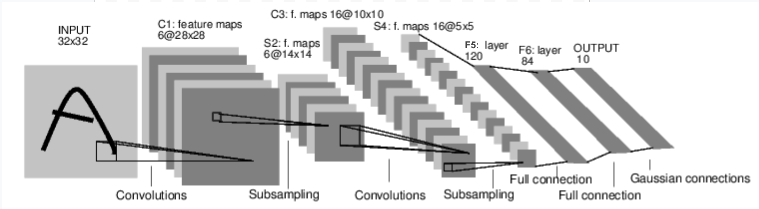

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1, self.pool = None, None
        self.conv2, self.fc1 = None, None 
        self.fc2, self.fc3 = None, None
        ##### INPUT CODE HERE (~6 lines of code) ######
        self.flatten = nn.Flatten()
        self.conv1 = nn.Conv2d(3,6,5,stride=1)
        self.pool = nn.MaxPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(6,16,5, stride=1)
        self.fc1 = nn.Linear(400,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        ##############################################

    def forward(self, x):
        #  Implement the forward function which is responsible for implementing the net. 
        ##### INPUT CODE HERE (~6 lines of code) ######
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.flatten(x)
        op1 = F.relu(self.fc1(x))
        op2 = F.relu(self.fc2(op1))
        op3 = self.fc3(op2)
        return op3
        ##############################################

net = Net()
print(net)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


**STEP 4: Define a Loss Function and Optimizer (6 points)**

#### <span style="color: red;">To Do:</span>

1. Use a Classification Cross-Entropy Loss function and SGD with momentum as an optimizer. 
2. Set criterion as the CrossEntropyLoss(). Set the optimizer as the SGD with learning rate value set to 0.001 and momentum to 0.9

Helpful Links:

1. [Cross-Entropy Loss Function](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
2. [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)


In [8]:
import torch.optim as optim

##### INPUT CODE HERE (~2 lines of code) ######
CEloss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
##############################################

**STEP 5: Train the Network (15 points)**

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the network and optimize.
This will be done for 10 epochs. 

_Feel free to increase/decrease the number of epochs to see the model performance but ensure that in final submission, the number of epochs is 10._

#### <span style="color: red;">To Do:</span>

1. First find outputs by passing inputs through your neural net.
2. Calculate the loss using the loss function from **STEP 4** and store in variable 'loss'.
3. Backpropogate the loss.
4. Perform single optimization step using optimizer object.


Helpful Links:

1.   [Backpropogation](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html)
2.   [Optimize](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD.step)

In [9]:
epochs = 10

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0

    for inputs, labels in trainloader:
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        outputs, loss = None, None
        
        ##### INPUT CODE HERE (~4 lines of code) ######
        outputs = net(inputs)
        loss = CEloss(outputs, labels)
        loss.backward()
        optimizer.step()
        ##############################################

        # Update Loss so far
        running_loss += loss.item()
        
    # Printing the loss for each epoch
    print("Epoch {} -> Loss: {}".format(epoch + 1, running_loss / len(trainloader)))

print('...')
print('Finished Training')

Epoch 1 -> Loss: 2.0253315823364257
Epoch 2 -> Loss: 1.5719784540748596
Epoch 3 -> Loss: 1.4203059635353088
Epoch 4 -> Loss: 1.319192050113678
Epoch 5 -> Loss: 1.24024901222229
Epoch 6 -> Loss: 1.1755812948703765
Epoch 7 -> Loss: 1.1209635079669953
Epoch 8 -> Loss: 1.0733755177497863
Epoch 9 -> Loss: 1.0300527937412263
Epoch 10 -> Loss: 0.9903301649332047
...
Finished Training


You can save your trained model using:

In [10]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

**STEP 6: Predict on Sample Images**

We have trained the network for 10 passes over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

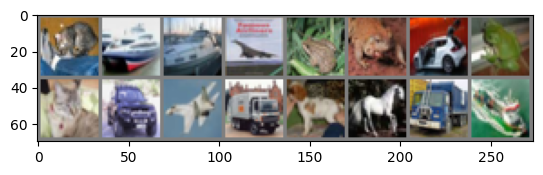

GroundTruth:  Cat   Ship  Ship  Airplane Frog  Frog  Automobie Frog  Cat   Automobie Airplane Truck Dog   Horse Truck Ship 


In [11]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(16)))

You can now see what the neural network thinks these examples above are:

In [12]:
net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(16)))

Predicted:  Cat   Automobie Ship  Ship  Frog  Frog  Automobie Frog  Dog   Automobie Airplane Truck Frog  Horse Truck Ship 


**STEP 7: Test the network on the test data. (15 points)**

You will now run the neural network on the entire test dataset and calculate the accuracy.

#### <span style="color: red;">To Do:</span>

1. Calculate outputs by running images through the network.
2. The class with the highest energy is what we choose as prediction. 
3. Find out number of correct predictions and store it in variable 'correct'.


Helpful Links: [torch.max](https://pytorch.org/docs/stable/generated/torch.max.html)


In [13]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs

with torch.no_grad():
    for data in testloader:

        images, labels = data
        total += labels.size(0)
        
        outputs = None
        #correct = None
        
        ##### INPUT CODE HERE (~3 lines of code) ######
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        ##############################################

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 60 %


**STEP 8: Analyse Results**

- Randomly picking a class out of 10 classes will result in 10% accuracy.
- Any accuracy higher than 10% means that the neural net has learnt something.

We can find out what are the classes that performed well, and the classes that did not perform well.

In [14]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Airplane is 58.1 %
Accuracy for class: Automobie is 63.0 %
Accuracy for class: Bird  is 43.2 %
Accuracy for class: Cat   is 50.2 %
Accuracy for class: Deer  is 52.1 %
Accuracy for class: Dog   is 41.4 %
Accuracy for class: Frog  is 72.8 %
Accuracy for class: Horse is 71.0 %
Accuracy for class: Ship  is 76.0 %
Accuracy for class: Truck is 77.2 %




---

